In [65]:
import http.client 
import json
import pandas as pd
import calendar
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Daily

In [ ]:
import http.client 

C = ["USD","JPY","EUR"]

headers = {
     'x-ibm-client-id': "00c8c441-159b-4dce-8184-811354fd1506", #เติมคีย์ของตัวเอง 
     'accept': "application/json"
     }

conn = http.client.HTTPSConnection("apigw1.bot.or.th")
data_ = {}
for CURRENCY in C:
  first = True
  for i in range(2020,2022):
    for j in range(1,13):
        START_PERIOD = f"{i}-{j:02d}-01"
        END_PERIOD = f"{i}-{j:02d}-{calendar.monthrange(i,j)[1]}"
        conn.request("GET", "/bot/public/Stat-ExchangeRate/v2/DAILY_AVG_EXG_RATE/?start_period="
                      +START_PERIOD + "&end_period="
                      +END_PERIOD +"&currency="+CURRENCY, headers=headers)

        res = conn.getresponse()
        data = res.read()
        obj = json.loads(data)
        if first:
          df = pd.DataFrame(obj['result']['data']['data_detail'])
          first = False
        else:
          df1 = pd.DataFrame(obj['result']['data']['data_detail'])
          df = pd.concat([df, df1], axis=0)

  data_[CURRENCY] =  df

In [ ]:
data_["USD"].sort_values(by=['period'], inplace=True,ignore_index=True)
data_["JPY"].sort_values(by=['period'], inplace=True,ignore_index=True)
data_["EUR"].sort_values(by=['period'], inplace=True,ignore_index=True)



data_d_EU,data_d_JP,data_d_US = data_["EUR"],data_["JPY"],data_["USD"]
data_d_EU["mid_rate"] = data_d_EU["mid_rate"].astype(float)
data_d_EU["buying_sight"] = data_d_EU["buying_sight"].astype(float)
data_d_EU["buying_transfer"] = data_d_EU["buying_transfer"].astype(float)
data_d_EU["selling"] = data_d_EU["selling"].astype(float)

data_d_JP["mid_rate"] = data_d_JP["mid_rate"].astype(float)
data_d_JP["buying_sight"] = data_d_JP["buying_sight"].astype(float)
data_d_JP["buying_transfer"] = data_d_JP["buying_transfer"].astype(float)
data_d_JP["selling"] = data_d_JP["selling"].astype(float)

data_d_US["mid_rate"] = data_d_US["mid_rate"].astype(float)
data_d_US["buying_sight"] = data_d_US["buying_sight"].astype(float)
data_d_US["buying_transfer"] = data_d_US["buying_transfer"].astype(float)
data_d_US["selling"] = data_d_US["selling"].astype(float)





# Monthly

In [ ]:
import http.client 

C = ["USD","JPY","EUR"]

headers = {
     'x-ibm-client-id': "00c8c441-159b-4dce-8184-811354fd1506", #เติมคีย์ของตัวเอง 
     'accept': "application/json"
     }

conn = http.client.HTTPSConnection("apigw1.bot.or.th")
data_m = {}
for CURRENCY in C:
  first = True
  for i in range(2020,2022):
    for j in range(1,13):
        START_PERIOD = f"{i}-{j:02d}"
        END_PERIOD = f"{i}-{j:02d}"
        conn.request("GET", "/bot/public/Stat-ExchangeRate/v2/MONTHLY_AVG_EXG_RATE/?start_period="
                      +START_PERIOD + "&end_period="
                      +END_PERIOD +"&currency="+CURRENCY, headers=headers)

        res = conn.getresponse()
        data = res.read()
        obj = json.loads(data)
        if first:
          df = pd.DataFrame(obj['result']['data']['data_detail'])
          first = False
        else:
          df1 = pd.DataFrame(obj['result']['data']['data_detail'])
          df = pd.concat([df, df1], axis=0)

  data_m[CURRENCY] =  df

In [ ]:
data_m["JPY"].reset_index(drop=True,inplace=True)
data_m["USD"].reset_index(drop=True,inplace=True)
data_m["EUR"].reset_index(drop=True,inplace=True)


data_m_EU,data_m_JP,data_m_US = data_m["EUR"],data_m["JPY"],data_m["USD"]
data_m_EU["mid_rate"] = data_m_EU["mid_rate"].astype(float)
data_m_EU["buying_sight"] = data_m_EU["buying_sight"].astype(float)
data_m_EU["buying_transfer"] = data_m_EU["buying_transfer"].astype(float)
data_m_EU["selling"] = data_m_EU["selling"].astype(float)

data_m_US["mid_rate"] = data_m_US["mid_rate"].astype(float)
data_m_US["buying_sight"] = data_m_US["buying_sight"].astype(float)
data_m_US["buying_transfer"] = data_m_US["buying_transfer"].astype(float)
data_m_US["selling"] = data_m_US["selling"].astype(float)

data_m_JP["mid_rate"] = data_m_JP["mid_rate"].astype(float)
data_m_JP["buying_sight"] = data_m_JP["buying_sight"].astype(float)
data_m_JP["buying_transfer"] = data_m_JP["buying_transfer"].astype(float)
data_m_JP["selling"] = data_m_JP["selling"].astype(float)

# Quarterly

In [ ]:
import http.client 

C = ["USD","JPY","EUR"]

headers = {
     'x-ibm-client-id': "00c8c441-159b-4dce-8184-811354fd1506", #เติมคีย์ของตัวเอง 
     'accept': "application/json"
     }

conn = http.client.HTTPSConnection("apigw1.bot.or.th")
data_q = {}
for CURRENCY in C:
  first = True
  for i in range(2020,2022):
    for j in range(1,5):
        START_PERIOD = f"{i}-Q{j}"
        END_PERIOD = f"{i}-Q{j}"
        conn.request("GET", "/bot/public/Stat-ExchangeRate/v2/QUARTERLY_AVG_EXG_RATE/?start_period="
                      +START_PERIOD + "&end_period="
                      +END_PERIOD +"&currency="+CURRENCY, headers=headers)

        res = conn.getresponse()
        data = res.read()
        obj = json.loads(data)
        if first:
          df = pd.DataFrame(obj['result']['data']['data_detail'])
          first = False
        else:
          df1 = pd.DataFrame(obj['result']['data']['data_detail'])
          df = pd.concat([df, df1], axis=0)

  data_q[CURRENCY] =  df

In [75]:
data_q["JPY"].reset_index(drop=True,inplace=True)
data_q["USD"].reset_index(drop=True,inplace=True)
data_q["EUR"].reset_index(drop=True,inplace=True)

data_q_EU,data_q_JP,data_q_US = data_q["EUR"],data_q["JPY"],data_q["USD"]
data_q_EU["mid_rate"] = data_q_EU["mid_rate"].astype(float)
data_q_EU["buying_sight"] = data_q_EU["buying_sight"].astype(float)
data_q_EU["buying_transfer"] = data_q_EU["buying_transfer"].astype(float)
data_q_EU["selling"] = data_q_EU["selling"].astype(float)

data_q_JP["mid_rate"] = data_q_JP["mid_rate"].astype(float)
data_q_JP["buying_sight"] = data_q_JP["buying_sight"].astype(float)
data_q_JP["buying_transfer"] = data_q_JP["buying_transfer"].astype(float)
data_q_JP["selling"] = data_q_JP["selling"].astype(float)

data_q_US["mid_rate"] = data_q_US["mid_rate"].astype(float)
data_q_US["buying_sight"] = data_q_US["buying_sight"].astype(float)
data_q_US["buying_transfer"] = data_q_US["buying_transfer"].astype(float)
data_q_US["selling"] = data_q_US["selling"].astype(float)

# a)

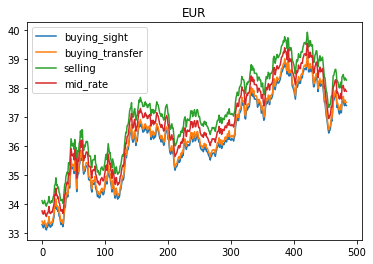

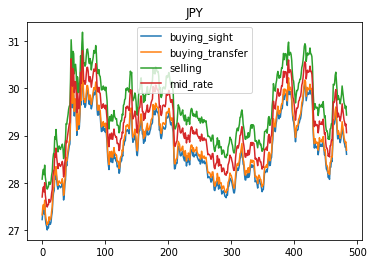

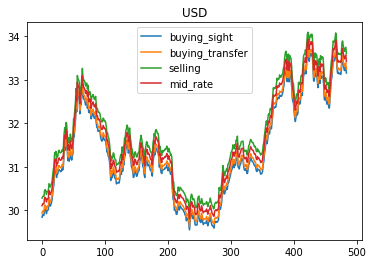

In [ ]:
df_for_plotEU = data_d_EU[['period','buying_sight','buying_transfer','selling','mid_rate']]
df_for_plotJP = data_d_JP[['period','buying_sight','buying_transfer','selling','mid_rate']]
df_for_plotUS = data_d_US[['period','buying_sight','buying_transfer','selling','mid_rate']]

lines_EU = df_for_plotEU.plot.line(title="EUR")
lines_JP = df_for_plotJP.plot.line(title="JPY")
lines_US = df_for_plotUS.plot.line(title="USD")

# b)

In [ ]:
date = {"month":[],"year":[]}
for i in range(len(data_d_EU["period"])):
  date["month"].append(int(data_d_EU["period"][i][5:7]))
  date["year"].append(int(data_d_EU["period"][i][0:4]))
date = pd.DataFrame(date)
data_d_EU = pd.concat([data_d_EU,date],axis = 1)

date = {"month":[],"year":[]}
for i in range(len(data_d_JP["period"])):
  date["month"].append(int(data_d_JP["period"][i][5:7]))
  date["year"].append(int(data_d_JP["period"][i][0:4]))
date = pd.DataFrame(date)
data_d_JP = pd.concat([data_d_JP,date],axis = 1)

date = {"month":[],"year":[]}
for i in range(len(data_d_US["period"])):
  date["month"].append(int(data_d_US["period"][i][5:7]))
  date["year"].append(int(data_d_US["period"][i][0:4]))
date = pd.DataFrame(date)
data_d_US = pd.concat([data_d_US,date],axis = 1)



In [ ]:
max_US = pd.DataFrame()
for i in range(2020,2022):
  for j in range(1,13):
    month_ = data_d_US.loc[(data_d_US["month"] == j) & (data_d_US["year"] == i)]
    index_ = month_["selling"].idxmax()
    max_US = pd.concat([max_US,month_.loc[[index_]]])

max_JP = pd.DataFrame()
for i in range(2020,2022):
  for j in range(1,13):
    month_ = data_d_JP.loc[(data_d_JP["month"] == j) & (data_d_JP["year"] == i)]
    index_ = month_["selling"].idxmax()
    max_JP = pd.concat([max_JP,month_.loc[[index_]]])

max_EU = pd.DataFrame()
for i in range(2020,2022):
  for j in range(1,13):
    month_ = data_d_EU.loc[(data_d_EU["month"] == j) & (data_d_EU["year"] == i)]
    index_ = month_["selling"].idxmax()
    max_EU = pd.concat([max_EU,month_.loc[[index_]]])


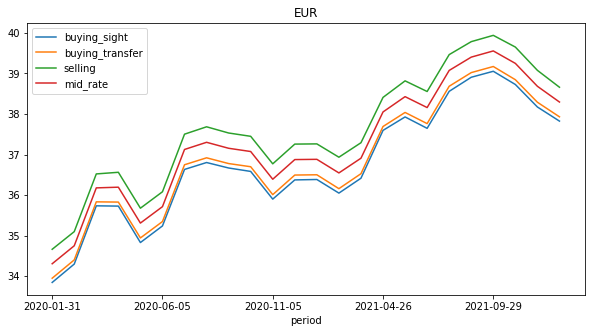

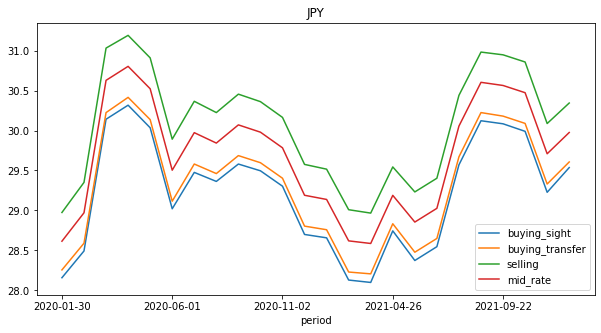

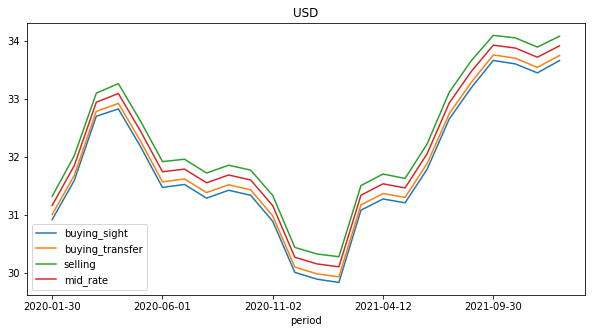

In [ ]:
max_for_plotEU = max_EU[['period','buying_sight','buying_transfer','selling','mid_rate']]
max_for_plotJP = max_JP[['period','buying_sight','buying_transfer','selling','mid_rate']]
max_for_plotUS = max_US[['period','buying_sight','buying_transfer','selling','mid_rate']]

max_for_plotEU.set_index("period",inplace=True)
max_for_plotJP.set_index("period",inplace=True)
max_for_plotUS.set_index("period",inplace=True)

max_line_EU = max_for_plotEU.plot.line(title="EUR",figsize=(10,5))
max_line_JP = max_for_plotJP.plot.line(title="JPY",figsize=(10,5))
max_line_US = max_for_plotUS.plot.line(title="USD",figsize=(10,5))

# c)

In [ ]:

AVG_EU = {"period":[],"AVG_buying_sight":[],"AVG_buying_transfer":[],"AVG_selling":[],"AVG_mid_rate":[]}

for i in range(2020,2022):
  for j in range(1,13):
    month_ = data_d_EU.loc[(data_d_EU["month"] == j) & (data_d_EU["year"] == i)]
    if f"{i}-{j:02d}" not in AVG_EU["period"]:
      AVG_EU["period"].append(f"{i}-{j:02d}")
    x = (month_["buying_sight"].sum(axis=0))/len(month_["buying_sight"])
    if x not in AVG_EU["AVG_buying_sight"]:
      AVG_EU["AVG_buying_sight"].append(x)
    x = (month_["buying_transfer"].sum(axis=0))/len(month_["buying_transfer"])
    if x not in AVG_EU["AVG_buying_transfer"]:
      AVG_EU["AVG_buying_transfer"].append(x)
    x = (month_["selling"].sum(axis=0))/len(month_["selling"])
    if x not in AVG_EU["AVG_selling"]:
      AVG_EU["AVG_selling"].append(x)
    x = (month_["mid_rate"].sum(axis=0))/len(month_["mid_rate"])
    if x not in AVG_EU["AVG_mid_rate"]:
      AVG_EU["AVG_mid_rate"].append(x)
AVG_EU = pd.DataFrame(AVG_EU)
AVG_EU

,period,AVG_buying_sight,AVG_buying_transfer,AVG_selling,AVG_mid_rate
0,2020-01,33.322195,33.429295,34.136068,33.782709
1,2020-02,33.700147,33.802253,34.512874,34.157584
2,2020-03,35.067632,35.168377,35.867700,35.518059
3,2020-04,35.014924,35.120890,35.848500,35.484724
4,2020-05,34.423228,34.533011,35.262839,34.897950
5,2020-06,34.595110,34.702676,35.439143,35.070924
6,2020-07,35.442975,35.551455,36.296590,35.924040
7,2020-08,36.431925,36.543235,37.297300,36.920295
8,2020-09,36.460810,36.570775,37.329055,36.949935
9,2020-10,36.296675,36.405675,37.162935,36.784325


In [ ]:
AVG_JP = {"period":[],"AVG_buying_sight":[],"AVG_buying_transfer":[],"AVG_selling":[],"AVG_mid_rate":[]}

for i in range(2020,2022):
  for j in range(1,13):
    month_ = data_d_JP.loc[(data_d_JP["month"] == j) & (data_d_JP["year"] == i)]
    if f"{i}-{j:02d}" not in AVG_JP["period"]:
      AVG_JP["period"].append(f"{i}-{j:02d}")
    x = (month_["buying_sight"].sum(axis=0))/len(month_["buying_sight"])
    if x not in AVG_JP["AVG_buying_sight"]:
      AVG_JP["AVG_buying_sight"].append(x)
    x = (month_["buying_transfer"].sum(axis=0))/len(month_["buying_transfer"])
    if x not in AVG_JP["AVG_buying_transfer"]:
      AVG_JP["AVG_buying_transfer"].append(x)
    x = (month_["selling"].sum(axis=0))/len(month_["selling"])
    if x not in AVG_JP["AVG_selling"]:
      AVG_JP["AVG_selling"].append(x)
    x = (month_["mid_rate"].sum(axis=0))/len(month_["mid_rate"])
    if x not in AVG_JP["AVG_mid_rate"]:
      AVG_JP["AVG_mid_rate"].append(x)
AVG_JP = pd.DataFrame(AVG_JP)
AVG_JP

,period,AVG_buying_sight,AVG_buying_transfer,AVG_selling,AVG_mid_rate
0,2020-01,27.375659,27.476255,28.223368,27.849827
1,2020-02,28.011537,28.106058,28.853800,28.479958
2,2020-03,29.405955,29.500900,30.242445,29.871695
3,2020-04,29.808838,29.910062,30.671181,30.290648
4,2020-05,29.387361,29.490889,30.251839,29.871389
5,2020-06,28.496643,28.602133,29.368529,28.985357
6,2020-07,28.916955,29.020505,29.787815,29.404185
7,2020-08,28.974005,29.077140,29.842275,29.459715
8,2020-09,29.239710,29.345460,30.107060,29.726275
9,2020-10,29.247130,29.350520,30.111745,29.731155


In [ ]:
AVG_US = {"period":[],"AVG_buying_sight":[],"AVG_buying_transfer":[],"AVG_selling":[],"AVG_mid_rate":[]}

for i in range(2020,2022):
  for j in range(1,13):
    month_ = data_d_US.loc[(data_d_US["month"] == j) & (data_d_US["year"] == i)]
    if f"{i}-{j:02d}" not in AVG_US["period"]:
      AVG_US["period"].append(f"{i}-{j:02d}")
    x = (month_["buying_sight"].sum(axis=0))/len(month_["buying_sight"])
    if x not in AVG_US["AVG_buying_sight"]:
      AVG_US["AVG_buying_sight"].append(x)
    x = (month_["buying_transfer"].sum(axis=0))/len(month_["buying_transfer"])
    if x not in AVG_US["AVG_buying_transfer"]:
      AVG_US["AVG_buying_transfer"].append(x)
    x = (month_["selling"].sum(axis=0))/len(month_["selling"])
    if x not in AVG_US["AVG_selling"]:
      AVG_US["AVG_selling"].append(x)
    x = (month_["mid_rate"].sum(axis=0))/len(month_["mid_rate"])
    if x not in AVG_US["AVG_mid_rate"]:
      AVG_US["AVG_mid_rate"].append(x)
AVG_US = pd.DataFrame(AVG_US)
AVG_US

,period,AVG_buying_sight,AVG_buying_transfer,AVG_selling,AVG_mid_rate
0,2020-01,30.173495,30.264232,30.605241,30.434764
1,2020-02,31.075358,31.166237,31.504516,31.335395
2,2020-03,31.837009,31.924432,32.250618,32.087550
3,2020-04,32.378633,32.470314,32.805190,32.637771
4,2020-05,31.780233,31.871322,32.212056,32.041711
5,2020-06,30.900000,30.994024,31.331005,31.162538
6,2020-07,31.153200,31.246575,31.581825,31.414220
7,2020-08,30.951635,31.045175,31.384790,31.215000
8,2020-09,31.090550,31.184390,31.517830,31.351130
9,2020-10,31.008800,31.102430,31.438485,31.270480


# d)

In [ ]:
data_m_EU["diff_buying_sight"] = (AVG_EU["AVG_buying_sight"]-data_m_EU["buying_sight"])/data_m_EU["buying_sight"]
data_m_EU["diff_buying_transfer"] = (AVG_EU["AVG_buying_transfer"]-data_m_EU["buying_transfer"])/data_m_EU["buying_transfer"]
data_m_EU["diff_selling"] = (AVG_EU["AVG_selling"]-data_m_EU["selling"])/data_m_EU["selling"]
data_m_EU["diff_mid_rate"] = (AVG_EU["AVG_mid_rate"]-data_m_EU["mid_rate"])/data_m_EU["mid_rate"]

data_m_JP["diff_buying_sight"] = (AVG_JP["AVG_buying_sight"]-data_m_JP["buying_sight"])/data_m_JP["buying_sight"]
data_m_JP["diff_buying_transfer"] = (AVG_JP["AVG_buying_transfer"]-data_m_JP["buying_transfer"])/data_m_JP["buying_transfer"]
data_m_JP["diff_selling"] = (AVG_JP["AVG_selling"]-data_m_JP["selling"])/data_m_JP["selling"]
data_m_JP["diff_mid_rate"] = (AVG_JP["AVG_mid_rate"]-data_m_JP["mid_rate"])/data_m_JP["mid_rate"]

data_m_US["diff_buying_sight"] = (AVG_US["AVG_buying_sight"]-data_m_US["buying_sight"])/data_m_US["buying_sight"]
data_m_US["diff_buying_transfer"] = (AVG_US["AVG_buying_transfer"]-data_m_US["buying_transfer"])/data_m_US["buying_transfer"]
data_m_US["diff_selling"] = (AVG_US["AVG_selling"]-data_m_US["selling"])/data_m_US["selling"]
data_m_US["diff_mid_rate"] = (AVG_US["AVG_mid_rate"]-data_m_US["mid_rate"])/data_m_US["mid_rate"]


In [ ]:
data_m_EU

,period,currency_id,currency_name_th,currency_name_eng,buying_sight,buying_transfer,selling,mid_rate,diff_buying_sight,diff_buying_transfer,diff_selling,diff_mid_rate
0,2020-01,EUR,ยูโรโซน : ยูโร (EUR),EURO ZONE : EURO (EUR),33.3222,33.4293,34.1361,33.7827,-1.364092e-07,-1.359722e-07,-9.320977e-07,2.690995e-07
1,2020-02,EUR,ยูโรโซน : ยูโร (EUR),EURO ZONE : EURO (EUR),33.7001,33.8023,34.5129,34.1576,1.405587e-06,-1.401337e-06,-7.624914e-07,-4.622536e-07
2,2020-03,EUR,ยูโรโซน : ยูโร (EUR),EURO ZONE : EURO (EUR),35.0676,35.1684,35.8677,35.5181,9.073384e-07,-6.462413e-07,-1.981010e-16,-1.151782e-06
3,2020-04,EUR,ยูโรโซน : ยูโร (EUR),EURO ZONE : EURO (EUR),35.0149,35.1209,35.8485,35.4847,6.799826e-07,-2.711721e-07,0.000000e+00,6.709800e-07
4,2020-05,EUR,ยูโรโซน : ยูโร (EUR),EURO ZONE : EURO (EUR),34.4232,34.5330,35.2628,34.8980,8.069493e-07,3.217534e-07,1.102830e-06,-1.432747e-06
5,2020-06,EUR,ยูโรโซน : ยูโร (EUR),EURO ZONE : EURO (EUR),34.5951,34.7027,35.4391,35.0709,2.752936e-07,-6.861000e-07,1.209318e-06,6.788969e-07
6,2020-07,EUR,ยูโรโซน : ยูโร (EUR),EURO ZONE : EURO (EUR),35.4430,35.5515,36.2966,35.9240,-7.053579e-07,-1.265769e-06,-2.755079e-07,1.113462e-06
7,2020-08,EUR,ยูโรโซน : ยูโร (EUR),EURO ZONE : EURO (EUR),36.4319,36.5432,37.2973,36.9203,6.862118e-07,9.577705e-07,0.000000e+00,-1.354269e-07
8,2020-09,EUR,ยูโรโซน : ยูโร (EUR),EURO ZONE : EURO (EUR),36.4608,36.5708,37.3291,36.9499,2.742672e-07,-6.836055e-07,-1.205494e-06,9.472285e-07
9,2020-10,EUR,ยูโรโซน : ยูโร (EUR),EURO ZONE : EURO (EUR),36.2967,36.4057,37.1629,36.7843,-6.887678e-07,-6.867057e-07,9.417995e-07,6.796378e-07


In [ ]:
data_m_JP

,period,currency_id,currency_name_th,currency_name_eng,buying_sight,buying_transfer,selling,mid_rate,diff_buying_sight,diff_buying_transfer,diff_selling,diff_mid_rate
0,2020-01,JPY,ญี่ปุ่น : เยน (100 เยน) (JPY),JAPAN : YEN (100 YEN) (JPY),27.3757,27.4763,28.2234,27.8498,-1.494358e-06,-1.654318e-06,-1.127369e-06,9.792791e-07
1,2020-02,JPY,ญี่ปุ่น : เยน (100 เยน) (JPY),JAPAN : YEN (100 YEN) (JPY),28.0115,28.1061,28.8538,28.4800,1.315249e-06,-1.498083e-06,-1.231281e-16,-1.478415e-06
2,2020-03,JPY,ญี่ปุ่น : เยน (100 เยน) (JPY),JAPAN : YEN (100 YEN) (JPY),29.4060,29.5009,30.2424,29.8717,-1.545758e-06,0.000000e+00,1.503007e-06,-1.521659e-07
3,2020-04,JPY,ญี่ปุ่น : เยน (100 เยน) (JPY),JAPAN : YEN (100 YEN) (JPY),29.8088,29.9101,30.6712,30.2906,1.277986e-06,-1.273658e-06,-6.210262e-07,1.572073e-06
4,2020-05,JPY,ญี่ปุ่น : เยน (100 เยน) (JPY),JAPAN : YEN (100 YEN) (JPY),29.3874,29.4909,30.2518,29.8714,-1.323318e-06,-3.767641e-07,1.285507e-06,-3.719649e-07
5,2020-06,JPY,ญี่ปุ่น : เยน (100 เยน) (JPY),JAPAN : YEN (100 YEN) (JPY),28.4966,28.6021,29.3685,28.9854,1.503939e-06,1.165416e-06,9.728596e-07,-1.478577e-06
6,2020-07,JPY,ญี่ปุ่น : เยน (100 เยน) (JPY),JAPAN : YEN (100 YEN) (JPY),28.9170,29.0205,29.7878,29.4042,-1.556178e-06,1.722920e-07,5.035619e-07,-5.101312e-07
7,2020-08,JPY,ญี่ปุ่น : เยน (100 เยน) (JPY),JAPAN : YEN (100 YEN) (JPY),28.9740,29.0771,29.8423,29.4597,1.725685e-07,1.375653e-06,-8.377370e-07,5.091702e-07
8,2020-09,JPY,ญี่ปุ่น : เยน (100 เยน) (JPY),JAPAN : YEN (100 YEN) (JPY),29.2397,29.3455,30.1071,29.7263,3.420008e-07,-1.363071e-06,-1.328590e-06,-8.410061e-07
9,2020-10,JPY,ญี่ปุ่น : เยน (100 เยน) (JPY),JAPAN : YEN (100 YEN) (JPY),29.2471,29.3505,30.1117,29.7312,1.025743e-06,6.814194e-07,1.494436e-06,-1.513562e-06


In [ ]:
data_m_US

,period,currency_id,currency_name_th,currency_name_eng,buying_sight,buying_transfer,selling,mid_rate,diff_buying_sight,diff_buying_transfer,diff_selling,diff_mid_rate
0,2020-01,USD,สหรัฐอเมริกา : ดอลลาร์ (USD),USA : DOLLAR (USD),30.1735,30.2642,30.6052,30.4348,-1.506439e-07,1.051347e-06,1.336671e-06,-1.194805e-06
1,2020-02,USD,สหรัฐอเมริกา : ดอลลาร์ (USD),USA : DOLLAR (USD),31.0754,31.1662,31.5045,31.3354,-1.354939e-06,1.182117e-06,5.011815e-07,-1.679620e-07
2,2020-03,USD,สหรัฐอเมริกา : ดอลลาร์ (USD),USA : DOLLAR (USD),31.8370,31.9244,32.2506,32.0876,2.855454e-07,9.966728e-07,5.637668e-07,-1.558234e-06
3,2020-04,USD,สหรัฐอเมริกา : ดอลลาร์ (USD),USA : DOLLAR (USD),32.3786,32.4703,32.8052,32.6378,1.029487e-06,4.399625e-07,-2.903140e-07,-8.754091e-07
4,2020-05,USD,สหรัฐอเมริกา : ดอลลาร์ (USD),USA : DOLLAR (USD),31.7802,31.8713,32.2121,32.0417,1.048871e-06,6.972487e-07,-1.379744e-06,3.467703e-07
5,2020-06,USD,สหรัฐอเมริกา : ดอลลาร์ (USD),USA : DOLLAR (USD),30.9000,30.9940,31.3310,31.1625,-1.149746e-16,7.681978e-07,1.519870e-07,1.222471e-06
6,2020-07,USD,สหรัฐอเมริกา : ดอลลาร์ (USD),USA : DOLLAR (USD),31.1532,31.2466,31.5818,31.4142,0.000000e+00,-8.000870e-07,7.915952e-07,6.366548e-07
7,2020-08,USD,สหรัฐอเมริกา : ดอลลาร์ (USD),USA : DOLLAR (USD),30.9516,31.0452,31.3848,31.2150,1.130798e-06,-8.052775e-07,-3.186256e-07,1.138143e-16
8,2020-09,USD,สหรัฐอเมริกา : ดอลลาร์ (USD),USA : DOLLAR (USD),31.0906,31.1844,31.5178,31.3511,-1.608203e-06,-3.206732e-07,9.518431e-07,9.569042e-07
9,2020-10,USD,สหรัฐอเมริกา : ดอลลาร์ (USD),USA : DOLLAR (USD),31.0088,31.1024,31.4385,31.2705,0.000000e+00,9.645558e-07,-4.771220e-07,-6.395804e-07


# e)

In [76]:
AVG_qEU = {"period":[],"AVG_buying_sight":[],"AVG_buying_transfer":[],"AVG_selling":[],"AVG_mid_rate":[]}
AVG_qJP = {"period":[],"AVG_buying_sight":[],"AVG_buying_transfer":[],"AVG_selling":[],"AVG_mid_rate":[]}
AVG_qUS = {"period":[],"AVG_buying_sight":[],"AVG_buying_transfer":[],"AVG_selling":[],"AVG_mid_rate":[]}
for i in range(2020,2022):
  for j in range(1,5):
    if j == 1:
      qUS = data_d_US.loc[(data_d_US["month"] <= 3) & (data_d_US["year"] == i)]
      if f"{i}-Q{j}" not in AVG_qUS["period"]:
        AVG_qUS["period"].append(f"{i}-Q{j}")
      x = (qUS["buying_sight"].sum(axis=0))/len(qUS["buying_sight"])
      if x not in AVG_qUS["AVG_buying_sight"]:
        AVG_qUS["AVG_buying_sight"].append(x)
      x = (qUS["buying_transfer"].sum(axis=0))/len(qUS["buying_transfer"])
      if x not in AVG_qUS["AVG_buying_transfer"]:
        AVG_qUS["AVG_buying_transfer"].append(x)
      x = (qUS["selling"].sum(axis=0))/len(qUS["selling"])
      if x not in AVG_qUS["AVG_selling"]:
        AVG_qUS["AVG_selling"].append(x)
      x = (qUS["mid_rate"].sum(axis=0))/len(qUS["mid_rate"])
      if x not in AVG_qUS["AVG_mid_rate"]:
        AVG_qUS["AVG_mid_rate"].append(x)
      
      qEU = data_d_EU.loc[(data_d_EU["month"] <= 3) & (data_d_EU["year"] == i)]
      if f"{i}-Q{j}" not in AVG_qEU["period"]:
        AVG_qEU["period"].append(f"{i}-Q{j}")
      x = (qEU["buying_sight"].sum(axis=0))/len(qEU["buying_sight"])
      if x not in AVG_qEU["AVG_buying_sight"]:
        AVG_qEU["AVG_buying_sight"].append(x)
      x = (qEU["buying_transfer"].sum(axis=0))/len(qEU["buying_transfer"])
      if x not in AVG_qEU["AVG_buying_transfer"]:
        AVG_qEU["AVG_buying_transfer"].append(x)
      x = (qEU["selling"].sum(axis=0))/len(qEU["selling"])
      if x not in AVG_qEU["AVG_selling"]:
        AVG_qEU["AVG_selling"].append(x)
      x = (qEU["mid_rate"].sum(axis=0))/len(qEU["mid_rate"])
      if x not in AVG_qEU["AVG_mid_rate"]:
        AVG_qEU["AVG_mid_rate"].append(x)


      qJP = data_d_JP.loc[(data_d_JP["month"] <= 3) & (data_d_JP["year"] == i)]
      if f"{i}-Q{j}" not in AVG_qJP["period"]:
        AVG_qJP["period"].append(f"{i}-Q{j}")
      x = (qJP["buying_sight"].sum(axis=0))/len(qJP["buying_sight"])
      if x not in AVG_qJP["AVG_buying_sight"]:
        AVG_qJP["AVG_buying_sight"].append(x)
      x = (qJP["buying_transfer"].sum(axis=0))/len(qJP["buying_transfer"])
      if x not in AVG_qJP["AVG_buying_transfer"]:
        AVG_qJP["AVG_buying_transfer"].append(x)
      x = (qJP["selling"].sum(axis=0))/len(qJP["selling"])
      if x not in AVG_qJP["AVG_selling"]:
        AVG_qJP["AVG_selling"].append(x)
      x = (qJP["mid_rate"].sum(axis=0))/len(qJP["mid_rate"])
      if x not in AVG_qJP["AVG_mid_rate"]:
        AVG_qJP["AVG_mid_rate"].append(x)
    if j == 2:
      qUS = data_d_US.loc[((data_d_US["month"] > 3) & (data_d_US["month"] <= 6)) & (data_d_US["year"] == i)]
      if f"{i}-Q{j}" not in AVG_qUS["period"]:
        AVG_qUS["period"].append(f"{i}-Q{j}")
      x = (qUS["buying_sight"].sum(axis=0))/len(qUS["buying_sight"])
      if x not in AVG_qUS["AVG_buying_sight"]:
        AVG_qUS["AVG_buying_sight"].append(x)
      x = (qUS["buying_transfer"].sum(axis=0))/len(qUS["buying_transfer"])
      if x not in AVG_qUS["AVG_buying_transfer"]:
        AVG_qUS["AVG_buying_transfer"].append(x)
      x = (qUS["selling"].sum(axis=0))/len(qUS["selling"])
      if x not in AVG_qUS["AVG_selling"]:
        AVG_qUS["AVG_selling"].append(x)
      x = (qUS["mid_rate"].sum(axis=0))/len(qUS["mid_rate"])
      if x not in AVG_qUS["AVG_mid_rate"]:
        AVG_qUS["AVG_mid_rate"].append(x)
      
      qEU = data_d_EU.loc[((data_d_EU["month"] > 3) & (data_d_EU["month"] <= 6)) & (data_d_EU["year"] == i)]
      if f"{i}-Q{j}" not in AVG_qEU["period"]:
        AVG_qEU["period"].append(f"{i}-Q{j}")
      x = (qEU["buying_sight"].sum(axis=0))/len(qEU["buying_sight"])
      if x not in AVG_qEU["AVG_buying_sight"]:
        AVG_qEU["AVG_buying_sight"].append(x)
      x = (qEU["buying_transfer"].sum(axis=0))/len(qEU["buying_transfer"])
      if x not in AVG_qEU["AVG_buying_transfer"]:
        AVG_qEU["AVG_buying_transfer"].append(x)
      x = (qEU["selling"].sum(axis=0))/len(qEU["selling"])
      if x not in AVG_qEU["AVG_selling"]:
        AVG_qEU["AVG_selling"].append(x)
      x = (qEU["mid_rate"].sum(axis=0))/len(qEU["mid_rate"])
      if x not in AVG_qEU["AVG_mid_rate"]:
        AVG_qEU["AVG_mid_rate"].append(x)


      qJP = data_d_JP.loc[((data_d_JP["month"] > 3) & (data_d_JP["month"] <= 6)) & (data_d_JP["year"] == i)]
      if f"{i}-Q{j}" not in AVG_qJP["period"]:
        AVG_qJP["period"].append(f"{i}-Q{j}")
      x = (qJP["buying_sight"].sum(axis=0))/len(qJP["buying_sight"])
      if x not in AVG_qJP["AVG_buying_sight"]:
        AVG_qJP["AVG_buying_sight"].append(x)
      x = (qJP["buying_transfer"].sum(axis=0))/len(qJP["buying_transfer"])
      if x not in AVG_qJP["AVG_buying_transfer"]:
        AVG_qJP["AVG_buying_transfer"].append(x)
      x = (qJP["selling"].sum(axis=0))/len(qJP["selling"])
      if x not in AVG_qJP["AVG_selling"]:
        AVG_qJP["AVG_selling"].append(x)
      x = (qJP["mid_rate"].sum(axis=0))/len(qJP["mid_rate"])
      if x not in AVG_qJP["AVG_mid_rate"]:
        AVG_qJP["AVG_mid_rate"].append(x)
    if j == 3:
      qUS = data_d_US.loc[((data_d_US["month"] > 6) & (data_d_US["month"] <= 9)) & (data_d_US["year"] == i)]
      if f"{i}-Q{j}" not in AVG_qUS["period"]:
        AVG_qUS["period"].append(f"{i}-Q{j}")
      x = (qUS["buying_sight"].sum(axis=0))/len(qUS["buying_sight"])
      if x not in AVG_qUS["AVG_buying_sight"]:
        AVG_qUS["AVG_buying_sight"].append(x)
      x = (qUS["buying_transfer"].sum(axis=0))/len(qUS["buying_transfer"])
      if x not in AVG_qUS["AVG_buying_transfer"]:
        AVG_qUS["AVG_buying_transfer"].append(x)
      x = (qUS["selling"].sum(axis=0))/len(qUS["selling"])
      if x not in AVG_qUS["AVG_selling"]:
        AVG_qUS["AVG_selling"].append(x)
      x = (qUS["mid_rate"].sum(axis=0))/len(qUS["mid_rate"])
      if x not in AVG_qUS["AVG_mid_rate"]:
        AVG_qUS["AVG_mid_rate"].append(x)
      
      qEU = data_d_EU.loc[((data_d_EU["month"] > 6) & (data_d_EU["month"] <= 9)) & (data_d_EU["year"] == i)]
      if f"{i}-Q{j}" not in AVG_qEU["period"]:
        AVG_qEU["period"].append(f"{i}-Q{j}")
      x = (qEU["buying_sight"].sum(axis=0))/len(qEU["buying_sight"])
      if x not in AVG_qEU["AVG_buying_sight"]:
        AVG_qEU["AVG_buying_sight"].append(x)
      x = (qEU["buying_transfer"].sum(axis=0))/len(qEU["buying_transfer"])
      if x not in AVG_qEU["AVG_buying_transfer"]:
        AVG_qEU["AVG_buying_transfer"].append(x)
      x = (qEU["selling"].sum(axis=0))/len(qEU["selling"])
      if x not in AVG_qEU["AVG_selling"]:
        AVG_qEU["AVG_selling"].append(x)
      x = (qEU["mid_rate"].sum(axis=0))/len(qEU["mid_rate"])
      if x not in AVG_qEU["AVG_mid_rate"]:
        AVG_qEU["AVG_mid_rate"].append(x)


      qJP = data_d_JP.loc[((data_d_JP["month"] > 6) & (data_d_JP["month"] <= 9)) & (data_d_JP["year"] == i)]
      if f"{i}-Q{j}" not in AVG_qJP["period"]:
        AVG_qJP["period"].append(f"{i}-Q{j}")
      x = (qJP["buying_sight"].sum(axis=0))/len(qJP["buying_sight"])
      if x not in AVG_qJP["AVG_buying_sight"]:
        AVG_qJP["AVG_buying_sight"].append(x)
      x = (qJP["buying_transfer"].sum(axis=0))/len(qJP["buying_transfer"])
      if x not in AVG_qJP["AVG_buying_transfer"]:
        AVG_qJP["AVG_buying_transfer"].append(x)
      x = (qJP["selling"].sum(axis=0))/len(qJP["selling"])
      if x not in AVG_qJP["AVG_selling"]:
        AVG_qJP["AVG_selling"].append(x)
      x = (qJP["mid_rate"].sum(axis=0))/len(qJP["mid_rate"])
      if x not in AVG_qJP["AVG_mid_rate"]:
        AVG_qJP["AVG_mid_rate"].append(x)
    if j == 4:
      qUS = data_d_US.loc[(data_d_US["month"] >9) & (data_d_US["year"] == i)]
      if f"{i}-Q{j}" not in AVG_qUS["period"]:
        AVG_qUS["period"].append(f"{i}-Q{j}")
      x = (qUS["buying_sight"].sum(axis=0))/len(qUS["buying_sight"])
      if x not in AVG_qUS["AVG_buying_sight"]:
        AVG_qUS["AVG_buying_sight"].append(x)
      x = (qUS["buying_transfer"].sum(axis=0))/len(qUS["buying_transfer"])
      if x not in AVG_qUS["AVG_buying_transfer"]:
        AVG_qUS["AVG_buying_transfer"].append(x)
      x = (qUS["selling"].sum(axis=0))/len(qUS["selling"])
      if x not in AVG_qUS["AVG_selling"]:
        AVG_qUS["AVG_selling"].append(x)
      x = (qUS["mid_rate"].sum(axis=0))/len(qUS["mid_rate"])
      if x not in AVG_qUS["AVG_mid_rate"]:
        AVG_qUS["AVG_mid_rate"].append(x)
      
      qEU = data_d_EU.loc[(data_d_EU["month"] >9) & (data_d_EU["year"] == i)]
      if f"{i}-Q{j}" not in AVG_qEU["period"]:
        AVG_qEU["period"].append(f"{i}-Q{j}")
      x = (qEU["buying_sight"].sum(axis=0))/len(qEU["buying_sight"])
      if x not in AVG_qEU["AVG_buying_sight"]:
        AVG_qEU["AVG_buying_sight"].append(x)
      x = (qEU["buying_transfer"].sum(axis=0))/len(qEU["buying_transfer"])
      if x not in AVG_qEU["AVG_buying_transfer"]:
        AVG_qEU["AVG_buying_transfer"].append(x)
      x = (qEU["selling"].sum(axis=0))/len(qEU["selling"])
      if x not in AVG_qEU["AVG_selling"]:
        AVG_qEU["AVG_selling"].append(x)
      x = (qEU["mid_rate"].sum(axis=0))/len(qEU["mid_rate"])
      if x not in AVG_qEU["AVG_mid_rate"]:
        AVG_qEU["AVG_mid_rate"].append(x)


      qJP = data_d_JP.loc[(data_d_JP["month"] >9) & (data_d_JP["year"] == i)]
      if f"{i}-Q{j}" not in AVG_qJP["period"]:
        AVG_qJP["period"].append(f"{i}-Q{j}")
      x = (qJP["buying_sight"].sum(axis=0))/len(qJP["buying_sight"])
      if x not in AVG_qJP["AVG_buying_sight"]:
        AVG_qJP["AVG_buying_sight"].append(x)
      x = (qJP["buying_transfer"].sum(axis=0))/len(qJP["buying_transfer"])
      if x not in AVG_qJP["AVG_buying_transfer"]:
        AVG_qJP["AVG_buying_transfer"].append(x)
      x = (qJP["selling"].sum(axis=0))/len(qJP["selling"])
      if x not in AVG_qJP["AVG_selling"]:
        AVG_qJP["AVG_selling"].append(x)
      x = (qJP["mid_rate"].sum(axis=0))/len(qJP["mid_rate"])
      if x not in AVG_qJP["AVG_mid_rate"]:
        AVG_qJP["AVG_mid_rate"].append(x)
AVG_qEU = pd.DataFrame(AVG_qEU)
AVG_qUS = pd.DataFrame(AVG_qUS)
AVG_qJP = pd.DataFrame(AVG_qEU)


In [88]:
data_q_EU["diff_buying_sight"] = (AVG_qEU["AVG_buying_sight"]-data_q_EU["buying_sight"])/data_q_EU["buying_sight"]
data_q_EU["diff_buying_transfer"] = (AVG_qEU["AVG_buying_transfer"]-data_q_EU["buying_transfer"])/data_q_EU["buying_transfer"]
data_q_EU["diff_selling"] = (AVG_qEU["AVG_selling"]-data_q_EU["selling"])/data_q_EU["selling"]
data_q_EU["diff_mid_rate"] = (AVG_qEU["AVG_mid_rate"]-data_q_EU["mid_rate"])/data_q_EU["mid_rate"]

data_q_JP["diff_buying_sight"] = (AVG_qJP["AVG_buying_sight"]-data_q_JP["buying_sight"])/data_q_JP["buying_sight"]
data_q_JP["diff_buying_transfer"] = (AVG_qJP["AVG_buying_transfer"]-data_q_JP["buying_transfer"])/data_q_JP["buying_transfer"]
data_q_JP["diff_selling"] = (AVG_qJP["AVG_selling"]-data_q_JP["selling"])/data_q_JP["selling"]
data_q_JP["diff_mid_rate"] = (AVG_qJP["AVG_mid_rate"]-data_q_JP["mid_rate"])/data_q_JP["mid_rate"]

data_q_US["diff_buying_sight"] = (AVG_qUS["AVG_buying_sight"]-data_q_US["buying_sight"])/data_q_US["buying_sight"]
data_q_US["diff_buying_transfer"] = (AVG_qUS["AVG_buying_transfer"]-data_q_US["buying_transfer"])/data_q_US["buying_transfer"]
data_q_US["diff_selling"] = (AVG_qUS["AVG_selling"]-data_q_US["selling"])/data_q_US["selling"]
data_q_US["diff_mid_rate"] = (AVG_qUS["AVG_mid_rate"]-data_q_US["mid_rate"])/data_q_US["mid_rate"]

In [83]:
data_q_EU

,period,currency_id,currency_name_th,currency_name_eng,buying_sight,buying_transfer,selling,mid_rate,diff_buying_sight,diff_buying_transfer,diff_selling,diff_mid_rate
0,2020-Q1,EUR,ยูโรโซน : ยูโร (EUR),EURO ZONE : EURO (EUR),34.0300,34.1333,34.8389,34.4861,4.613110e-04,4.621005e-04,4.450417e-04,4.541512e-04
1,2020-Q2,EUR,ยูโรโซน : ยูโร (EUR),EURO ZONE : EURO (EUR),34.6777,34.7855,35.5168,35.1512,3.685366e-04,3.637052e-04,3.583281e-04,3.602058e-04
2,2020-Q3,EUR,ยูโรโซน : ยูโร (EUR),EURO ZONE : EURO (EUR),36.1119,36.2218,36.9743,36.5981,9.230568e-08,5.981665e-07,4.056872e-07,-2.732382e-07
3,2020-Q4,EUR,ยูโรโซน : ยูโร (EUR),EURO ZONE : EURO (EUR),35.9841,36.0964,36.8479,36.4721,-2.599759e-04,-2.631841e-04,-2.588117e-04,-2.589651e-04
4,2021-Q1,EUR,ยูโรโซน : ยูโร (EUR),EURO ZONE : EURO (EUR),35.9832,36.0960,36.8580,36.4770,4.548571e-04,4.474407e-04,4.326307e-04,4.405201e-04
5,2021-Q2,EUR,ยูโรโซน : ยูโร (EUR),EURO ZONE : EURO (EUR),37.2876,37.4004,38.1684,37.7845,1.095797e-04,1.112663e-04,1.173930e-04,1.125032e-04
6,2021-Q3,EUR,ยูโรโซน : ยูโร (EUR),EURO ZONE : EURO (EUR),38.3040,38.4194,39.1937,38.8066,1.085964e-04,1.063811e-04,1.053905e-04,1.051949e-04
7,2021-Q4,EUR,ยูโรโซน : ยูโร (EUR),EURO ZONE : EURO (EUR),37.6863,37.7994,38.5627,38.1811,-6.436657e-04,-6.436046e-04,-6.352864e-04,-6.401330e-04


In [89]:
data_q_JP

,period,currency_id,currency_name_th,currency_name_eng,buying_sight,buying_transfer,selling,mid_rate,diff_buying_sight,diff_buying_transfer,diff_selling,diff_mid_rate
0,2020-Q1,JPY,ญี่ปุ่น : เยน (100 เยน) (JPY),JAPAN : YEN (100 YEN) (JPY),28.2644,28.3611,29.1065,28.7338,0.204543,0.204081,0.197478,0.200738
1,2020-Q2,JPY,ญี่ปุ่น : เยน (100 เยน) (JPY),JAPAN : YEN (100 YEN) (JPY),29.2309,29.3344,30.0972,29.7158,0.186774,0.186257,0.180493,0.183339
2,2020-Q3,JPY,ญี่ปุ่น : เยน (100 เยน) (JPY),JAPAN : YEN (100 YEN) (JPY),29.0436,29.1477,29.9124,29.5301,0.243369,0.242699,0.236087,0.239349
3,2020-Q4,JPY,ญี่ปุ่น : เยน (100 เยน) (JPY),JAPAN : YEN (100 YEN) (JPY),28.8417,28.9447,29.7021,29.3234,0.247317,0.246753,0.240261,0.243466
4,2021-Q1,JPY,ญี่ปุ่น : เยน (100 เยน) (JPY),JAPAN : YEN (100 YEN) (JPY),28.1206,28.2219,28.9788,28.6004,0.280185,0.279579,0.272446,0.275964
5,2021-Q2,JPY,ญี่ปุ่น : เยน (100 เยน) (JPY),JAPAN : YEN (100 YEN) (JPY),28.1981,28.2982,29.0460,28.6721,0.322489,0.321800,0.314222,0.317962
6,2021-Q3,JPY,ญี่ปุ่น : เยน (100 เยน) (JPY),JAPAN : YEN (100 YEN) (JPY),29.4529,29.5505,30.3002,29.9253,0.300658,0.300265,0.293649,0.296919
7,2021-Q4,JPY,ญี่ปุ่น : เยน (100 เยน) (JPY),JAPAN : YEN (100 YEN) (JPY),28.9225,29.0174,29.7501,29.3838,0.302171,0.301808,0.295397,0.298561


In [85]:
data_q_US

,period,currency_id,currency_name_th,currency_name_eng,buying_sight,buying_transfer,selling,mid_rate,diff_buying_sight,diff_buying_transfer,diff_selling,diff_mid_rate
0,2020-Q1,USD,สหรัฐอเมริกา : ดอลลาร์ (USD),USA : DOLLAR (USD),31.0286,31.1183,31.4534,31.2859,-7.105580e-05,-7.335040e-05,-7.544545e-05,-7.524055e-05
1,2020-Q2,USD,สหรัฐอเมริกา : ดอลลาร์ (USD),USA : DOLLAR (USD),31.6863,31.7785,32.1161,31.9473,-1.485921e-04,-1.442799e-04,-1.499248e-04,-1.464391e-04
2,2020-Q3,USD,สหรัฐอเมริกา : ดอลลาร์ (USD),USA : DOLLAR (USD),31.0651,31.1587,31.4948,31.3268,9.120632e-07,4.279169e-07,4.762691e-07,-5.320258e-07
3,2020-Q4,USD,สหรัฐอเมริกา : ดอลลาร์ (USD),USA : DOLLAR (USD),30.3531,30.4464,30.7829,30.6147,2.100280e-04,2.095486e-04,2.042801e-04,2.060557e-04
4,2021-Q1,USD,สหรัฐอเมริกา : ดอลลาร์ (USD),USA : DOLLAR (USD),29.9927,30.0864,30.4276,30.2570,1.170941e-03,1.169419e-03,1.139712e-03,1.155240e-03
5,2021-Q2,USD,สหรัฐอเมริกา : ดอลลาร์ (USD),USA : DOLLAR (USD),31.0907,31.1846,31.5257,31.3552,1.348065e-04,1.367072e-04,1.377322e-04,1.365229e-04
6,2021-Q3,USD,สหรัฐอเมริกา : ดอลลาร์ (USD),USA : DOLLAR (USD),32.6507,32.7447,33.0911,32.9179,1.542228e-04,1.526472e-04,1.513905e-04,1.528240e-04
7,2021-Q4,USD,สหรัฐอเมริกา : ดอลลาร์ (USD),USA : DOLLAR (USD),33.1136,33.2071,33.5494,33.3783,-3.367444e-04,-3.377216e-04,-3.343247e-04,-3.366770e-04


# f)

In [111]:
date = {"month":[],"year":[]}
for i in range(len(data_m_EU["period"])):
  date["month"].append(int(data_m_EU["period"][i][5:7]))
  date["year"].append(int(data_m_EU["period"][i][0:4]))
date = pd.DataFrame(date)
data_m_EU = pd.concat([data_m_EU,date],axis = 1)

date = {"month":[],"year":[]}
for i in range(len(data_m_JP["period"])):
  date["month"].append(int(data_m_JP["period"][i][5:7]))
  date["year"].append(int(data_m_JP["period"][i][0:4]))
date = pd.DataFrame(date)
data_m_JP = pd.concat([data_m_JP,date],axis = 1)

date = {"month":[],"year":[]}
for i in range(len(data_m_US["period"])):
  date["month"].append(int(data_m_US["period"][i][5:7]))
  date["year"].append(int(data_m_US["period"][i][0:4]))
date = pd.DataFrame(date)

data_m_US = pd.concat([data_m_US,date],axis = 1)


In [136]:
US_2021 = data_m_US.loc[(data_m_US["year"] == 2021)]
JP_2021 = data_m_JP.loc[(data_m_JP["year"] == 2021)]
JP_2021 = JP_2021[["period",'buying_transfer','selling']]
JP_2021.reset_index(drop=True,inplace=True)
US_2021.reset_index(drop=True,inplace=True)

JP_2021["100 Dollas buying"] = (US_2021["buying_transfer"]*100.0)/JP_2021["buying_transfer"]
JP_2021["100 Dollas selling"] = (US_2021["selling"]*100.0)/JP_2021["selling"]
JP_2021

,period,buying_transfer,selling,100 Dollas buying,100 Dollas selling
0,2021-01,28.5712,29.3305,104.427885,102.880619
1,2021-02,28.1161,28.8777,106.016482,104.424868
2,2021-03,27.9785,28.7282,109.424379,107.740130
3,2021-04,28.3899,29.1378,109.771433,108.113859
4,2021-05,28.3086,29.0547,109.948920,108.299518
5,2021-06,28.1961,28.9456,110.883775,109.201053
6,2021-07,29.2150,29.9647,111.015232,109.392385
7,2021-08,29.8004,30.5510,110.548181,108.970574
8,2021-09,29.6361,30.3848,110.868502,109.273387
9,2021-10,29.2823,30.0173,113.760531,112.113015


# g)

In [139]:
EU_2021 = data_m_EU.loc[(data_m_EU["year"] == 2021)]
JP_2021 = data_m_JP.loc[(data_m_JP["year"] == 2021)]
JP_2021 = JP_2021[["period",'buying_sight','mid_rate']]
JP_2021.reset_index(drop=True,inplace=True)
EU_2021.reset_index(drop=True,inplace=True)
JP_2021["500 EUR buying sight"] = (EU_2021["buying_sight"]*500.0)/JP_2021["buying_sight"]
JP_2021["500 EUR midrate"] = (EU_2021["mid_rate"]*500.0)/JP_2021["mid_rate"]
JP_2021

,period,buying_sight,mid_rate,500 EUR buying sight,500 EUR midrate
0,2021-01,28.4688,28.9509,632.847187,630.818040
1,2021-02,28.0167,28.4969,638.090853,636.067432
2,2021-03,27.8762,28.3534,648.626786,646.370453
3,2021-04,28.2890,28.7639,653.854855,651.613655
4,2021-05,28.2080,28.6816,664.781268,662.475245
5,2021-06,28.0973,28.5708,664.917981,662.666079
6,2021-07,29.1155,29.5899,653.401109,651.416531
7,2021-08,29.7029,30.1757,647.653933,645.829260
8,2021-09,29.5404,30.0104,649.779624,647.980367
9,2021-10,29.1866,29.6498,656.911048,655.029714
